In [195]:
# Imports
import findspark
import matplotlib.pyplot as plt
from pyspark.sql.functions import avg, col
from pyspark.sql import functions as F
findspark.init()

In [196]:
from pyspark.sql.functions import concat, lit

In [197]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("sparkFunctions").getOrCreate()

In [198]:
from pyspark import SparkFiles
csv_file_paths = [
    "Resources/CurrentPopulationSurvey_1981.csv",
    "Resources/CurrentPopulationSurvey_1990.csv",
    "Resources/CurrentPopulationSurvey_1999.csv",
    "Resources/CurrentPopulationSurvey_2007.csv",
    "Resources/CurrentPopulationSurvey_2009.csv",
    "Resources/CurrentPopulationSurvey_2011.csv",
    "Resources/CurrentPopulationSurvey_2013.csv"]
dfs = [spark.read.csv(path, sep=",", header=True, ignoreLeadingWhiteSpace=True) for path in csv_file_paths]
combined_df = dfs[0]
for df in dfs [1:]:
    combined_df = combined_df.union(df)
# Show DataFrame
combined_df.show()

+----+--------------------+---------+---+-----+-------------+--------------------+----------+------+---+---+--------+--------+-------+
|year|          state name| region_1|age|sex_1|       race_1|      martial status|union type|educ99|occ|ind|wkswork1|uhrswork|incwage|
+----+--------------------+---------+---+-----+-------------+--------------------+----------+------+---+---+--------+--------+-------+
|1981|            Virginia|    South| 38| male|Other nonhisp|Married, spouse p...|      NULL|  NULL|245|798|      52|      40|17000.0|
|1981|             Vermont|Northeast| 58| male|White nonhisp|Married, spouse p...|      NULL|  NULL|470|339|      52|      48|19000.0|
|1981|                Utah|     West| 35| male|White nonhisp|Married, spouse p...|      NULL|  NULL|715|417|      52|      43|21000.0|
|1981|            Illinois|  Midwest| 33| male|White nonhisp|            Divorced|      NULL|  NULL|485|857|      52|      60|19740.0|
|1981|District of Columbia|    South| 45| male|Black no

In [199]:
# Select columns for updated DF
updated_df = combined_df.select(
    'year',
    'state name',
    'region_1',
    'age',
    'sex_1',
    'race_1',
    'martial status',
    'occ',
    'incwage')

# Show updated DF
updated_df.show(truncate=False)

+----+--------------------+---------+---+-----+-------------+-----------------------+---+-------+
|year|state name          |region_1 |age|sex_1|race_1       |martial status         |occ|incwage|
+----+--------------------+---------+---+-----+-------------+-----------------------+---+-------+
|1981|Virginia            |South    |38 |male |Other nonhisp|Married, spouse present|245|17000.0|
|1981|Vermont             |Northeast|58 |male |White nonhisp|Married, spouse present|470|19000.0|
|1981|Utah                |West     |35 |male |White nonhisp|Married, spouse present|715|21000.0|
|1981|Illinois            |Midwest  |33 |male |White nonhisp|Divorced               |485|19740.0|
|1981|District of Columbia|South    |45 |male |Black nonhisp|Never mar              |13 |46000.0|
|1981|Kansas              |Midwest  |45 |male |White nonhisp|Married, spouse present|694|9000.0 |
|1981|Alabama             |South    |32 |male |White nonhisp|Married, spouse present|751|9500.0 |
|1981|Michigan      

In [200]:
# Rename columns and update DF
updated_df = updated_df.withColumnRenamed('martial status', 'Marital Status')
updated_df = updated_df.withColumnRenamed('year', 'Year')
updated_df = updated_df.withColumnRenamed('state_name', 'State Name')
updated_df = updated_df.withColumnRenamed('region_1', 'Region')
updated_df = updated_df.withColumnRenamed('sex_1', 'Sex')
updated_df = updated_df.withColumnRenamed('race_1', 'Race')
updated_df = updated_df.withColumnRenamed('occ', 'Occupation Code')
updated_df = updated_df.withColumnRenamed('incwage', 'Wage')
updated_df = updated_df.withColumnRenamed('age','Age')

# Show updated DF
updated_df.show(truncate=False)

+----+--------------------+---------+---+----+-------------+-----------------------+---------------+-------+
|Year|state name          |Region   |Age|Sex |Race         |Marital Status         |Occupation Code|Wage   |
+----+--------------------+---------+---+----+-------------+-----------------------+---------------+-------+
|1981|Virginia            |South    |38 |male|Other nonhisp|Married, spouse present|245            |17000.0|
|1981|Vermont             |Northeast|58 |male|White nonhisp|Married, spouse present|470            |19000.0|
|1981|Utah                |West     |35 |male|White nonhisp|Married, spouse present|715            |21000.0|
|1981|Illinois            |Midwest  |33 |male|White nonhisp|Divorced               |485            |19740.0|
|1981|District of Columbia|South    |45 |male|Black nonhisp|Never mar              |13             |46000.0|
|1981|Kansas              |Midwest  |45 |male|White nonhisp|Married, spouse present|694            |9000.0 |
|1981|Alabama      

In [201]:
updated_df.dtypes

[('Year', 'string'),
 ('state name', 'string'),
 ('Region', 'string'),
 ('Age', 'string'),
 ('Sex', 'string'),
 ('Race', 'string'),
 ('Marital Status', 'string'),
 ('Occupation Code', 'string'),
 ('Wage', 'string')]

In [202]:
# Define age bins and labels
bins = [25, 30, 35, 40, 45, 50, 55, 60, 64]
labels = ['25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-64']

# Create age bins in updated DF
age_bins_df = updated_df.withColumn(
    'Age_Bin',
    F.when((F.col('Age') >= 25) & (F.col('Age') < 30), labels[0])
    .when((F.col('Age') >= 30) & (F.col('Age') < 35), labels[1])
    .when((F.col('Age') >= 35) & (F.col('Age') < 40), labels[2])
    .when((F.col('Age') >= 40) & (F.col('Age') < 45), labels[3])
    .when((F.col('Age') >= 45) & (F.col('Age') < 50), labels[4])
    .when((F.col('Age') >= 50) & (F.col('Age') < 55), labels[5])
    .when((F.col('Age') >= 55) & (F.col('Age') < 60), labels[6])
    .when((F.col('Age') >= 60) & (F.col('Age') <= 64), labels[7]))

# Show updated DF with the age bin
age_bins_df.show()

+----+--------------------+---------+---+----+-------------+--------------------+---------------+-------+-------+
|Year|          state name|   Region|Age| Sex|         Race|      Marital Status|Occupation Code|   Wage|Age_Bin|
+----+--------------------+---------+---+----+-------------+--------------------+---------------+-------+-------+
|1981|            Virginia|    South| 38|male|Other nonhisp|Married, spouse p...|            245|17000.0|  35-40|
|1981|             Vermont|Northeast| 58|male|White nonhisp|Married, spouse p...|            470|19000.0|  55-60|
|1981|                Utah|     West| 35|male|White nonhisp|Married, spouse p...|            715|21000.0|  35-40|
|1981|            Illinois|  Midwest| 33|male|White nonhisp|            Divorced|            485|19740.0|  30-35|
|1981|District of Columbia|    South| 45|male|Black nonhisp|           Never mar|             13|46000.0|  45-50|
|1981|              Kansas|  Midwest| 45|male|White nonhisp|Married, spouse p...|       

<Figure size 1200x800 with 0 Axes>

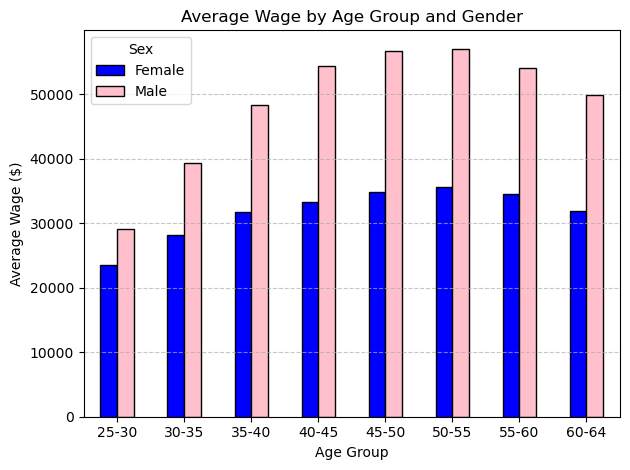

In [203]:
# Group the data by age and sex and calculate average wage
avg_wage_by_region = age_bins_df.groupBy('Age_Bin', 'Sex').agg(avg('Wage').alias('Average_Wage'))

# Convert to pandas DF
avg_wage_by_region_pd = avg_wage_by_region.toPandas().pivot(index='Age_Bin', columns='Sex', values='Average_Wage')

# Create plot
plt.figure(figsize=(12, 8))
avg_wage_by_region_pd.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

plt.title('Average Wage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Save the plot
plt.savefig('Age Wage Comparison.png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

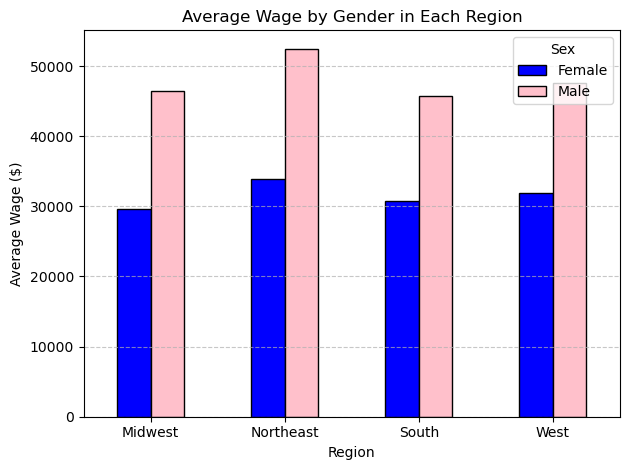

In [222]:
# Group data by region and sex and calculate average wage
avg_wage_by_region = updated_df.groupBy('Region', 'Sex').agg(avg('Wage').alias('Average_Wage'))

# Convert to pandas DF
avg_wage_by_region_pd = avg_wage_by_region.toPandas().pivot(index='Region', columns='Sex', values='Average_Wage')

# Create plot
plt.figure(figsize=(12, 8))
avg_wage_by_region_pd.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

plt.title('Average Wage by Gender in Each Region')
plt.xlabel('Region')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Save the plot
plt.savefig('Region Wage Comparison.png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()

In [205]:
# Format avg_wage_pd as currency
avg_wage_by_region_pd_formatted = avg_wage_pd.applymap(lambda x: f'${x:,.0f}')
avg_wage_by_region_pd_formatted

C:\Users\mcmul\AppData\Local\Temp\ipykernel_45912\1620472108.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  avg_wage_by_region_pd_formatted = avg_wage_pd.applymap(lambda x: f'${x:,.0f}')


Sex,female,male
Race,,
Black nonhisp,"$30,415","$37,169"
Hispanic,"$25,696","$34,255"
Other nonhisp,"$37,746","$52,634"
White nonhisp,"$32,094","$51,519"


<Figure size 800x1200 with 0 Axes>

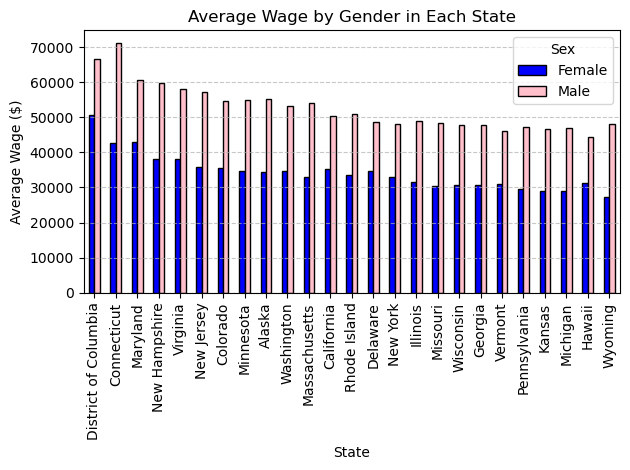

In [206]:
# Group the data by state and sex and calculate average wage
avg_wage_by_state1 = updated_df.groupBy('state name', 'Sex').agg(avg('Wage').alias('Average_Wage'))

# Convert to pandas DF
avg_wage_by_state_pd1 = avg_wage_by_state1.toPandas().pivot(index='state name', columns='Sex', values='Average_Wage')

# Sort by average wage for the top 25 states
top_states = avg_wage_by_state_pd1.mean(axis=1).nlargest(25).index
top_avg_wage_by_state_pd = avg_wage_by_state_pd1.loc[top_states]

# Create plot
plt.figure(figsize=(8, 12))
top_avg_wage_by_state_pd.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

plt.title('Average Wage by Gender in Each State')
plt.xlabel('State')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=90)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('State Wage Comparison p1.png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()

<Figure size 800x1200 with 0 Axes>

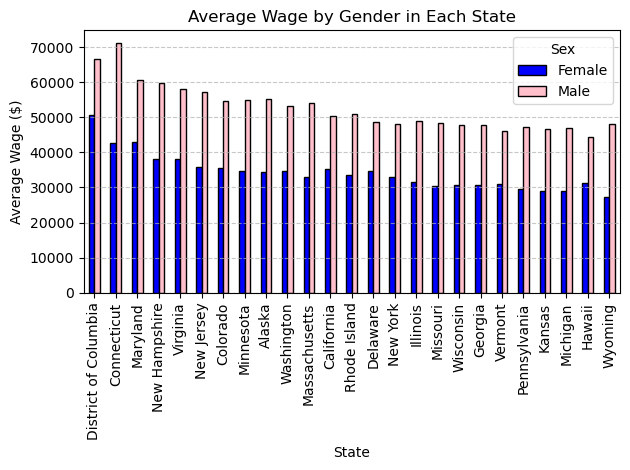

In [207]:
# Group the data by state and sex and calculate average wage
avg_wage_by_state2 = updated_df.groupBy('state name', 'Sex').agg(avg('Wage').alias('Average_Wage'))

# Convert to pandas DF
avg_wage_by_state_pd2 = avg_wage_by_state2.toPandas().pivot(index='state name', columns='Sex', values='Average_Wage')

# Sort by average wage for the lowest 25 states
bottom_states = avg_wage_by_state_pd2.mean(axis=1).nsmallest(25).index
bottom_avg_wage_by_state_pd = avg_wage_by_state_pd2.loc[top_states]

# Create plot
plt.figure(figsize=(8, 12))
bottom_avg_wage_by_state_pd.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

plt.title('Average Wage by Gender in Each State')
plt.xlabel('State')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=90)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('State Wage Comparison P2.png', dpi=300) 

# Show plot
plt.tight_layout()
plt.show()

In [208]:
# Format as currency
avg_wage_by_state_pd_formatted = avg_wage_by_state_pd.applymap(lambda x: f'${x:,.0f}')

avg_wage_by_state_pd_formatted

C:\Users\mcmul\AppData\Local\Temp\ipykernel_45912\2965035186.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  avg_wage_by_state_pd_formatted = avg_wage_by_state_pd.applymap(lambda x: f'${x:,.0f}')


Sex,female,male
state name,,
Alabama,"$25,495","$39,041"
Alaska,"$34,343","$55,060"
Arizona,"$29,819","$41,241"
Arkansas,"$24,644","$36,298"
California,"$35,112","$50,294"
Colorado,"$35,603","$54,689"
Connecticut,"$42,777","$71,195"
Delaware,"$34,737","$48,543"
District of Columbia,"$50,507","$66,576"


In [209]:
occupation_counts_by_sex = updated_df.groupby(['Sex', 'Occupation Code']).count()
sorted_counts = occupation_counts_by_sex.orderBy('count', ascending=False)
sorted_counts.show()

+------+---------------+-----+
|   Sex|Occupation Code|count|
+------+---------------+-----+
|female|           5700| 5414|
|  male|           9130| 4918|
|female|           2310| 4883|
|  male|            430| 3143|
|female|           3600| 2919|
|female|            313| 2750|
|female|           3130| 2621|
|female|           3255| 2515|
|  male|           4700| 2430|
|female|           4720| 2368|
|  male|           4220| 2286|
|female|           5240| 2152|
|female|           4230| 2108|
|  male|            245| 2105|
|female|           4700| 2054|
|female|           5000| 2039|
|female|            800| 1989|
|  male|           9620| 1964|
|female|           5120| 1915|
|female|            430| 1866|
+------+---------------+-----+
only showing top 20 rows



In [210]:
# top 25 results
top_counts = sorted_counts.orderBy('count', ascending=False).limit(25)

# Convert to pandas DF
top_counts_pd = top_counts.toPandas()
top_counts_pd = top_counts_pd.sort_values(by='count', ascending=False)

top_counts_pd

,Sex,Occupation Code,count
0,female,5700,5414
1,male,9130,4918
2,female,2310,4883
3,male,430,3143
4,female,3600,2919
5,female,313,2750
6,female,3130,2621
7,female,3255,2515
8,male,4700,2430
9,female,4720,2368


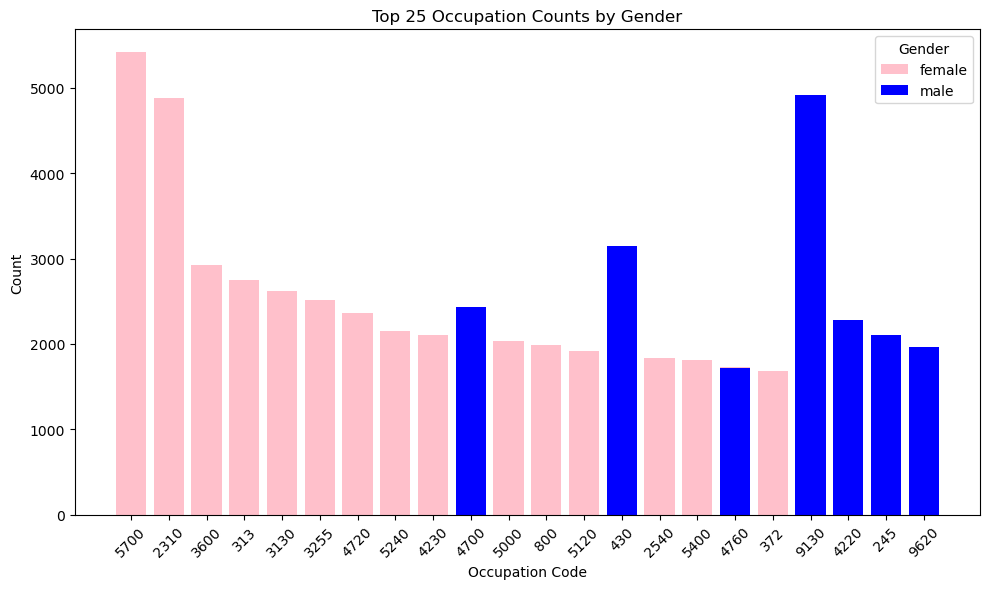

In [211]:
# Create plot
plt.figure(figsize=(10, 6))
for sex in top_counts_pd['Sex'].unique():
    subset = top_counts_pd[top_counts_pd['Sex'] == sex]
    plt.bar(subset['Occupation Code'].astype(str), subset['count'], label=sex, color='blue' if sex == 'male' else 'pink')
    
plt.xlabel('Occupation Code')
plt.ylabel('Count')
plt.title('Top 25 Occupation Counts by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show plot
plt.show()

In [212]:
sex_count = updated_df.groupby(['Sex']).count()
sex_count.show()

+------+------+
|   Sex| count|
+------+------+
|female|168376|
|  male|175911|
+------+------+



In [213]:
occupation_counts_overall = updated_df.groupby(['Occupation Code']).count()
sorted_counts = occupation_counts_overall.orderBy('count', ascending=False)
sorted_counts.show()

+---------------+-----+
|Occupation Code|count|
+---------------+-----+
|           2310| 6010|
|           5700| 5602|
|           9130| 5161|
|            430| 5009|
|           4700| 4484|
|           4220| 3568|
|           4760| 3455|
|           3600| 3238|
|            800| 3039|
|           5240| 2989|
|           4720| 2946|
|           5000| 2868|
|           3130| 2857|
|            313| 2794|
|           4020| 2786|
|           3255| 2758|
|             19| 2657|
|            245| 2583|
|           2320| 2461|
|           9620| 2446|
+---------------+-----+
only showing top 20 rows



<Figure size 1200x800 with 0 Axes>

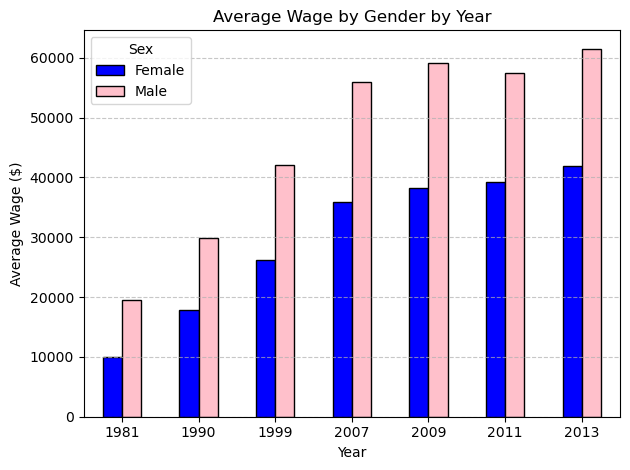

In [214]:
# Group the data by year and sex and calculate average wage
avg_wage_by_year = updated_df.groupBy('Year', 'Sex').agg(avg('Wage').alias('Average_Wage'))

# Convert to pandas DF
avg_wage_by_year_pd = avg_wage_by_year.toPandas().pivot(index='Year', columns='Sex', values='Average_Wage')

# Create plot
plt.figure(figsize=(12, 8))
avg_wage_by_year_pd.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

plt.title('Average Wage by Gender by Year')
plt.xlabel('Year')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Save the plot
plt.savefig('Yearly Wage Comparison.png', dpi=300)  # Save with high resolution

# Show plot
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

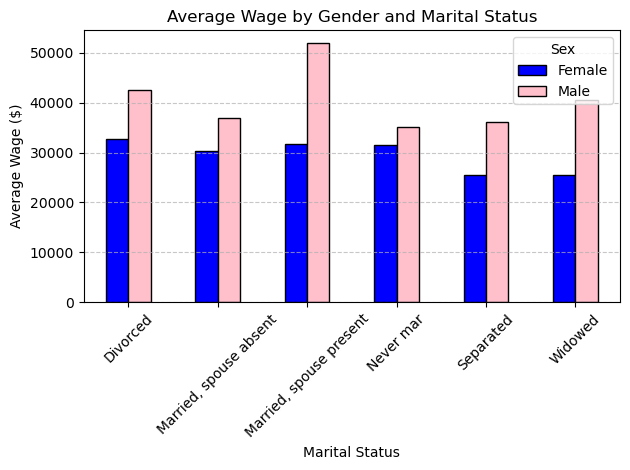

In [215]:
# Group the data by marital status and sex and calculate average wage
avg_wage_by_marital = updated_df.groupBy('Marital Status', 'Sex').agg(avg('Wage').alias('Average_Wage'))

# Convert to pandas DF
avg_wage_by_marital_pd = avg_wage_by_marital.toPandas().pivot(index='Marital Status', columns='Sex', values='Average_Wage')

# Create plot
plt.figure(figsize=(12, 8))
avg_wage_by_marital_pd.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

plt.title('Average Wage by Gender and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=45)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Save the plot
plt.savefig('Marital Status Wage Comparison.png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()

<Figure size 800x1200 with 0 Axes>

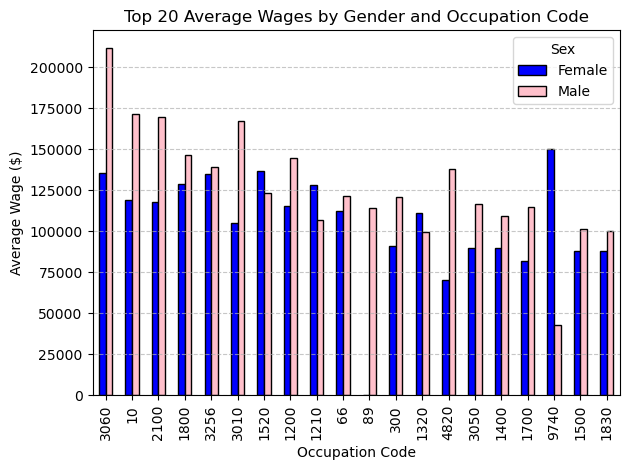

In [216]:
# Group data by occupation code and Sex and calculate average wage
avg_wage_by_occupation = updated_df.groupBy('Occupation Code', 'Sex').agg(avg('Wage').alias('Average_Wage'))

# Convert to pandas DataFrame for plotting
avg_wage_by_occupation_pd = avg_wage_by_occupation.toPandas().pivot(index='Occupation Code', columns='Sex', values='Average_Wage')

# Sort by average wage and get the top 20 occupations
top_occupation = avg_wage_by_occupation_pd.mean(axis=1).nlargest(20).index
top_avg_wage_by_occupation_pd = avg_wage_by_occupation_pd.loc[top_occupation]

# Create plot
plt.figure(figsize=(8, 12))
top_avg_wage_by_occupation_pd.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

plt.title('Top 20 Average Wages by Gender and Occupation Code')
plt.xlabel('Occupation Code')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=90)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save plot
plt.savefig('Occupation Code Comparison.png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

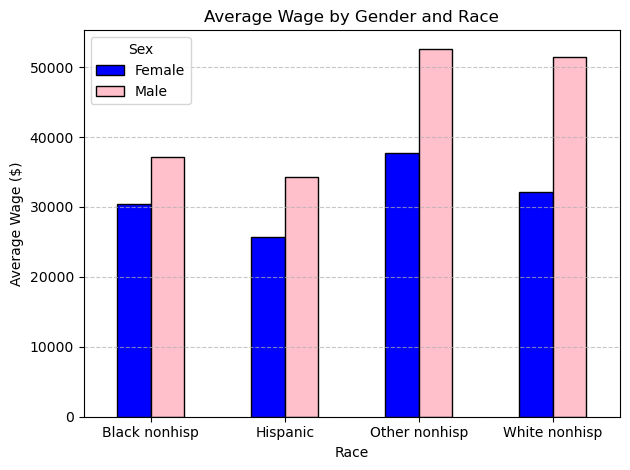

In [217]:
# Group data by race and sex and calculate average wages
avg_wage_by_race = updated_df.groupBy('Race', 'Sex').agg(avg('Wage').alias('Average_Wage'))

# Convert to pandas DF
avg_wage_by_race_pd = avg_wage_by_race.toPandas().pivot(index='Race', columns='Sex', values='Average_Wage')

# Create plot
plt.figure(figsize=(12, 8))
avg_wage_by_race_pd.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

plt.title('Average Wage by Gender and Race')
plt.xlabel('Race')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Save the plot
plt.savefig('Race and Gender Wage Comparison.png', dpi=300)

# Show plot
plt.tight_layout()
plt.show()

In [218]:
# Average wages by Year and Sex
avg_wage_by_gender_year = (updated_df.groupBy('Year', 'Sex').agg(F.avg('Wage').alias('Average_Wage')))

In [219]:
# Convert to pandas DF
avg_wage_by_gender_year_pd = avg_wage_by_gender_year.toPandas()

# Pivot DF
avg_wage_pivot = avg_wage_by_gender_year_pd.pivot(index='Year', columns='Sex', values='Average_Wage')

# Calculate wage gap
avg_wage_pivot['Wage_Gap'] = ((avg_wage_pivot['male'] - avg_wage_pivot['female']) / avg_wage_pivot['male']) * 100
avg_wage_pivot

Sex,female,male,Wage_Gap
Year,,,
1981,9898.469764,19466.873890,49.152238
1990,17777.511007,29865.680873,40.475119
1999,26161.166138,42076.207260,37.824324
2007,35925.591945,55940.521887,35.778947
2009,38153.524120,59178.657823,35.528237
2011,39186.030374,57441.479840,31.780953
2013,41906.379635,61496.970138,31.856188


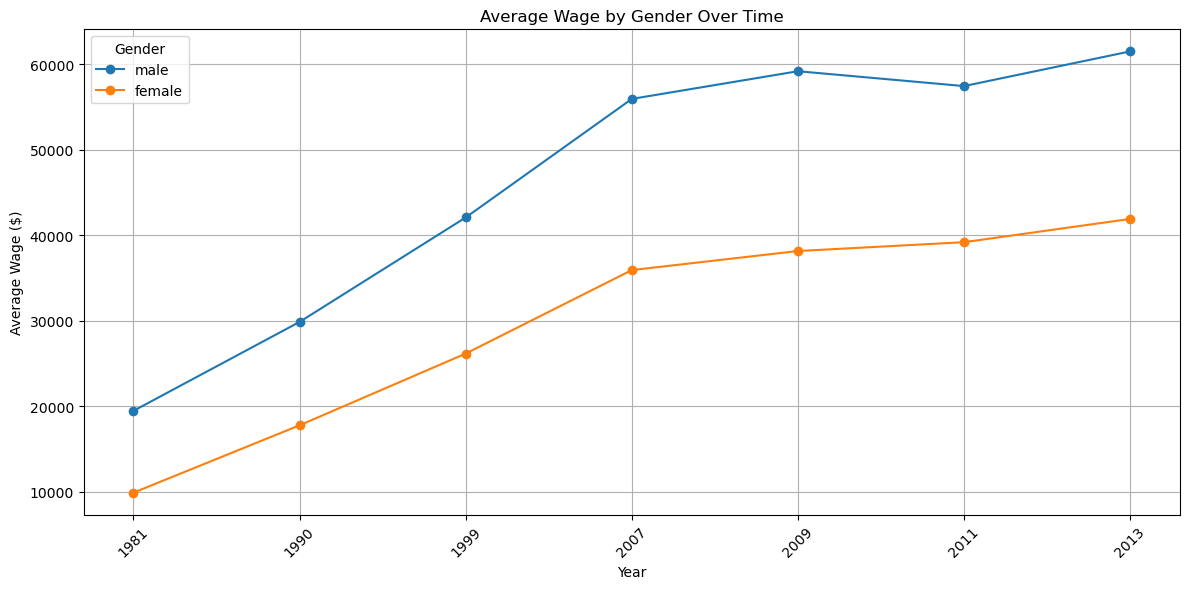

In [223]:
# Plot Chart
plt.figure(figsize=(12, 6))
avg_wage_pivot[['male', 'female']].plot(kind='line', marker='o', ax=plt.gca())
plt.title('Average Wage by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Gender')

# Save the plot
plt.savefig('Average Wage by Gender Comparison Over Time.png', dpi=300)

plt.tight_layout()
plt.show()

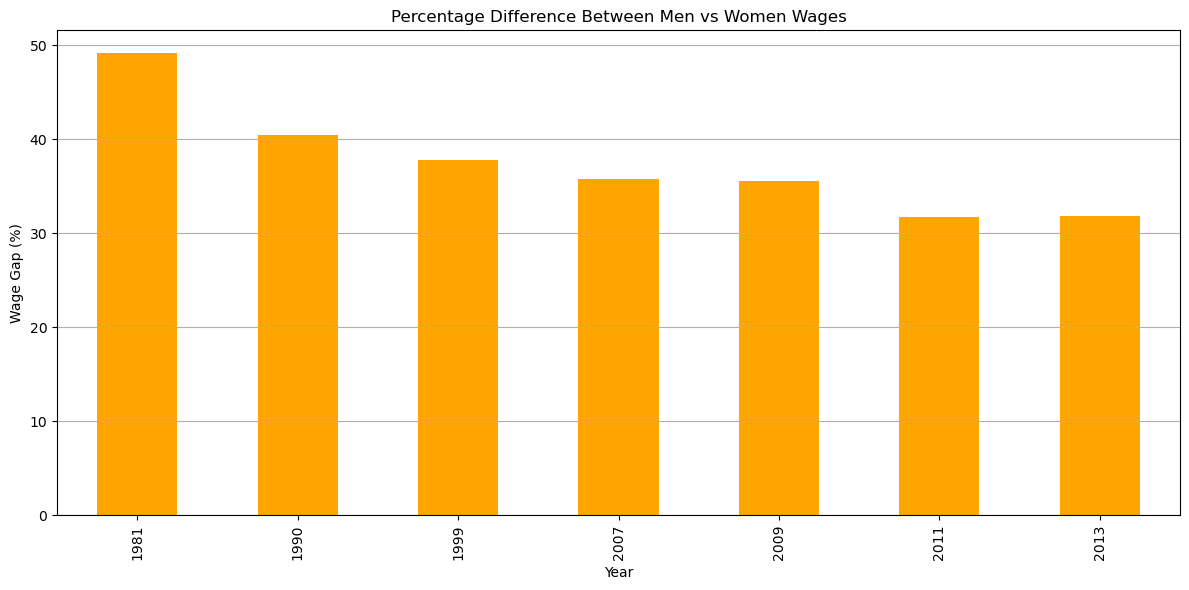

In [224]:
# Plot Chart
plt.figure(figsize=(12, 6))
avg_wage_pivot['Wage_Gap'].plot(kind='bar', color='orange')
plt.title('Percentage Difference Between Men vs Women Wages')
plt.xlabel('Year')
plt.ylabel('Wage Gap (%)')
plt.grid(axis='y')

# Save the plot
plt.savefig('Percentage Difference Between Men vs Women Wages.png', dpi=300)

plt.tight_layout()
plt.show()